## Задача
Имеется набор данных покупателей супермаркета. Проведите анализ и очистку этих данных.

### Описание данных

Дан файл Mall_Customers.csv, содержащий следующие данные по покупателям сети супермаркетов:
- CustomerID — идентификатор покупателя.
- Genre – пол покупателя.
- Age – возраст покупателя.
- Annual Income (k\$) – годовой доход покупателя, тысяч $.
- Spending Score (1–100) – рейтинг покупателя, целевая переменная.

### Задание 1

Загрузите данные из файла `Mall_Customers.csv` в ноутбук и выведите первые пять строк на экран.

In [1]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


### Задание 2

Проведите разведочный анализ загруженных данных. Обязательные атрибуты для анализа:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

Анализ дополнительных атрибутов и свойств данных приветствуется. Используйте средства визуализации там, где это необходимо.

По результатам анализа сделайте выводы о свойствах отдельных признаков и качестве данных в целом.

In [187]:
#Количество пропусков
df.isna().sum()


CustomerID                 0
Genre                     19
Age                       20
Annual Income (k$)        20
Spending Score (1-100)     0
dtype: int64

In [188]:
#процент пропусков
df.isna().sum() / df.shape[0] * 100

CustomerID                 0.0
Genre                      9.5
Age                       10.0
Annual Income (k$)        10.0
Spending Score (1-100)     0.0
dtype: float64

In [189]:
# Считаем количество строк в кроторых более 2х пропусков(так как всего 3 признак + целевая переменная + ID)
df_miss_row = df[df.isna().sum(axis=1) >= 2]
df_miss_row.shape

(5, 5)

In [190]:
# эти строки я бы  удалил, но такого задания не было
df[df.isna().sum(axis=1) >= 2]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,NaN,NaN,81
46,47,Female,NaN,NaN,55
54,55,NaN,50.0,NaN,45
106,107,NaN,NaN,63.0,50
123,124,NaN,39.0,NaN,91


Histogram for Genre


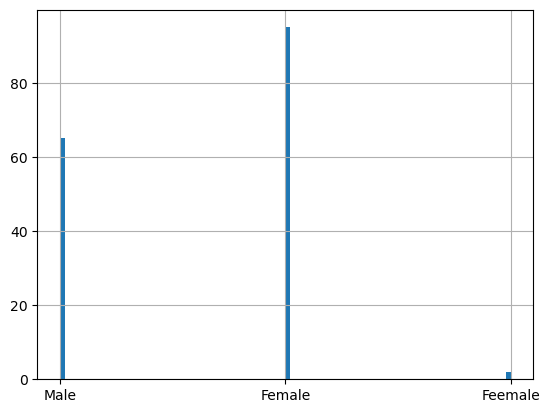

Histogram for Age


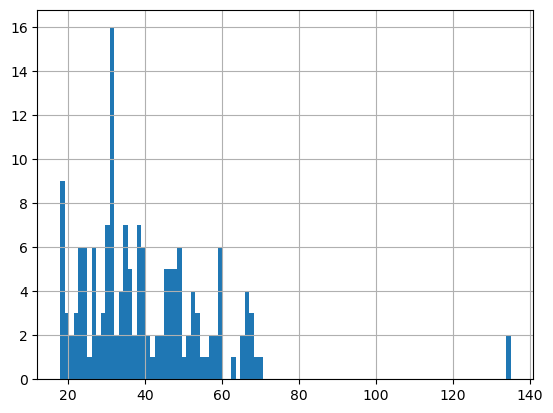

Histogram for Annual Income (k$)


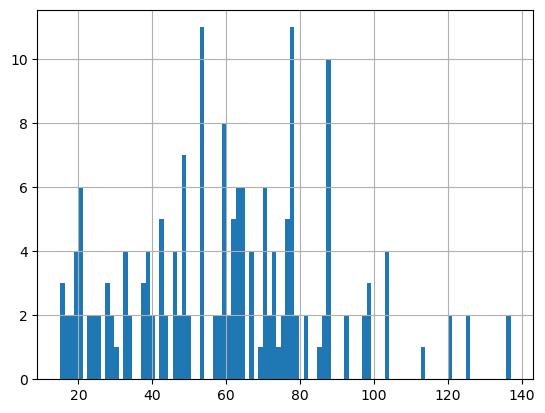

Histogram for Spending Score (1-100)


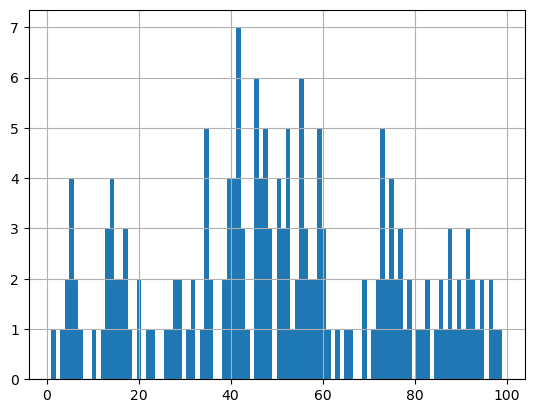

In [191]:
import matplotlib.pyplot as plt
df_2 = df[df['Annual Income (k$)'] < 1000000]
num_cols = [ 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for col in num_cols:
  print(f'Histogram for {col}')
  df_2[col].hist(bins=100)
  plt.show()

(0.0, 150.0)

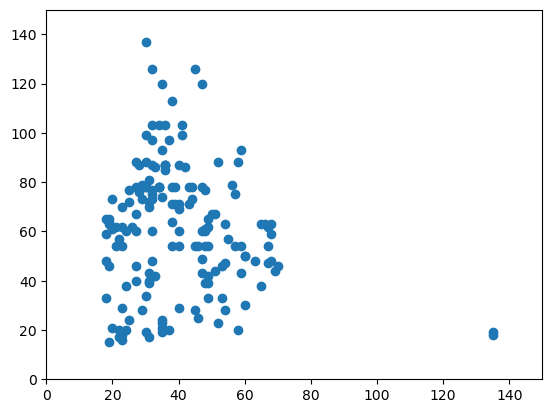

In [192]:
#Построим график без выброса в Annual Income (k$)( так как график не визуализируется нормально)

plt.scatter(df_2.Age, df_2['Annual Income (k$)'])
plt.xlim(0, 150)
plt.ylim(0, 150)

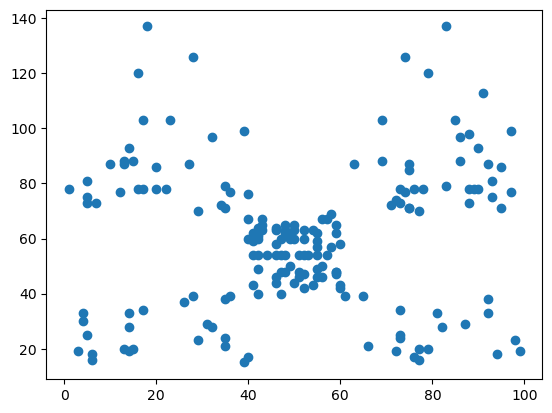

In [193]:
plt.scatter(df_2['Spending Score (1-100)'], df_2['Annual Income (k$)'])

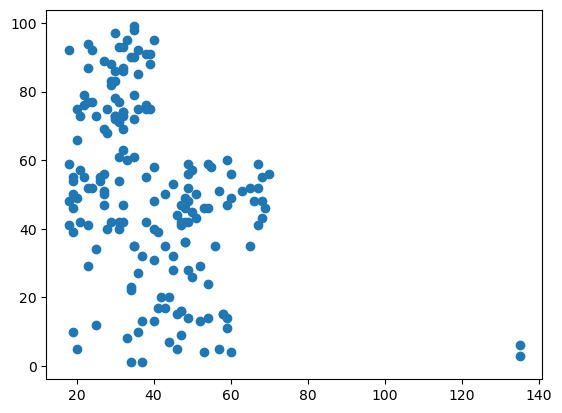

In [194]:
plt.scatter(df['Age'], df['Spending Score (1-100)'])

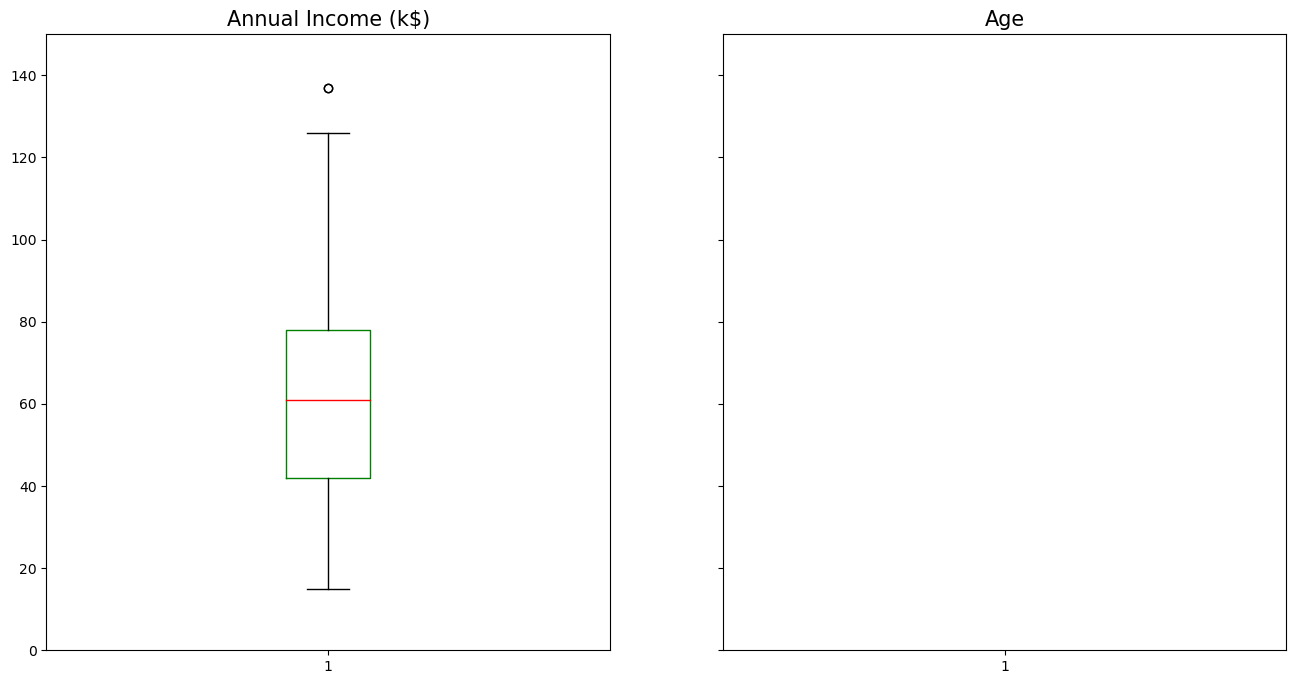

In [195]:
from matplotlib.ticker import FormatStrFormatter
fig, (ax, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), sharey=True)

ax.boxplot(df_2['Annual Income (k$)'], meanprops=dict(c='blue'), medianprops=dict(c='r'), boxprops = dict(c='green'), sym = 'o')
ax.set_title('Annual Income (k$)', fontsize=15)
ax.set_ylim([0, 150])

ax1.boxplot(df_2['Age'], meanprops=dict(c='pink'), medianprops=dict(c='r'), boxprops = dict(c='blue'), sym = '*')
ax1.set_title('Age', fontsize=15)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [21]:
def calculate_outliers(data): #функция для нахождения границ
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)

    return boundaries

boundaries = calculate_outliers(df['Annual Income (k$)'])
#Cчитаем и выводим количество выбросов в доходе.
is_outlier = (df['Annual Income (k$)'] < boundaries[0]) | (df['Annual Income (k$)'] > boundaries[1])
print('Kоличество выбросов в Annual Income (k$) = ', is_outlier.sum(), 
      'граница нижняя -', boundaries[0], 'граница верхняя -', boundaries[1])
df_cp = df[is_outlier].sort_values(by='Annual Income (k$)')
df_cp
#В данном случае 137к скорее аномалия, а вот уже 1000000к это выброс(либо опечатка).

Kоличество выбросов в Annual Income (k$) =  3 граница нижняя - -12.0 граница верхняя - 132.0


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,NaN,137.0,18
199,200,NaN,30.0,137.0,83
156,157,Male,37.0,1000000.0,1


In [23]:
boundaries = calculate_outliers(df['Age'])
#Cчитаем и выводим количество выбросов в возрасте.
is_outlier = (df['Age'] < boundaries[0]) | (df['Age'] > boundaries[1])
print('Kоличество выбросов в Age= ', is_outlier.sum(), 
      'граница нижняя -', boundaries[0], 'граница верхняя -', boundaries[1])
df_cp = df[is_outlier].sort_values(by='Age')
df_cp
#Данные значения являются выбросами, так как возраст 135 лет - цифра не реальная.

Kоличество выбросов в Age=  2 граница нижняя - -1.0 граница верхняя - 79.0


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
6,7,NaN,135.0,18.0,6
8,9,Male,135.0,19.0,3


In [24]:
boundaries = calculate_outliers(df['Spending Score (1-100)'])
#Cчитаем и выводим количество выбросов в возрасте.
is_outlier = (df['Spending Score (1-100)'] < boundaries[0]) | (df['Spending Score (1-100)'] > boundaries[1])
print('Kоличество выбросов вSpending Score (1-100) = ', is_outlier.sum(), 
      'граница нижняя -', boundaries[0], 'граница верхняя -', boundaries[1])
df_cp = df[is_outlier].sort_values(by='Spending Score (1-100)')
df_cp
#Выбросов нету

Kоличество выбросов вSpending Score (1-100) =  0 граница нижняя - -22.625 граница верхняя - 130.375


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)


# Выводы
### 1)В колонке Genre описка в женском поле (Feemale), Так же женщин больше, чем мужчин,примерно в 2 раза.
### 2)В колонке Age есть 2 выброса - возраст 135 лет, скорее всего это ошибки и изначения должны были быть 35.
### 3)В колонке Annual Income (k$) 1 выброс 1000000к - это миллиард(возможно опять ошибка и число не в тысячах записали, т.е. должен был быть миллион). 2 аномалии 137к, т.к. это вполне реальный доход.
### 4)В 3х колонках пропущено около 10% (Genre, Age, Annual Income (k$))
### 5)Есть 5 строк, в которых пропущено 2 признака.
### 6)Наибольшие оценки имеют люди до 40 лет
### 7)Люди со средним доходом имеют средние оценки, высоки и низкие оценки имеют люди с низким и высоким доходом
### 8)Наибольшие доходы имеют люди 30-40 лет


### Задание 3

Разделите данные на обучающую и тестовую выборки в пропорции 80:20. Здесь и далее используйте random_state = 1.

In [2]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['Spending Score (1-100)'])
y = df['Spending Score (1-100)']

X_train, X_test, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=1)


### Задание 4

Заполните пропуски в признаках в обучающей выборке с использованием инструментов sklearn. Для каждого признака выберите и аргументируйте стратегию заполнения пропусков.

In [3]:
#Заменим пропуски в Genre наиболее популярным значением, так как это категориальный признак, а пола существует всего 2.
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(strategy='most_frequent')

mode_cols = ['Genre']

X_train[mode_cols] = imp_mode.fit_transform(X_train[mode_cols])
X_train.head()


,CustomerID,Genre,Age,Annual Income (k$)
108,109,Male,68.0,63.0
107,108,Male,54.0,63.0
189,190,Female,36.0,103.0
14,15,Male,37.0,20.0
56,57,Female,51.0,44.0


In [4]:
#так же заменим описки Feemale на Female
X_train.loc[X_train['Genre'] == "Feemale", 'Genre'] = 'Female'
X_train['Genre'].value_counts()

Genre
Female    93
Male      67
Name: count, dtype: int64

In [5]:
#Чтобы заполнить пропуски  на 0 нет оснований, так как пропуски в доходах у работоспособного возраста, а нулей в возрасте быть не может.
# Выбрать среднее, либо метод к-ближайших соседей так же не можем, так как у нас есть выбросы и среднее по Annual Income (k$)
# будет выбросом(7000к), к-ближайших соседей так же сгенерирует выбросы.(7003к).
X_train[X_train['Annual Income (k$)'].isnull()]

,CustomerID,Genre,Age,Annual Income (k$)
39,40,Female,20.0,NaN
123,124,Female,39.0,NaN
138,139,Male,19.0,NaN
48,49,Female,29.0,NaN
66,67,Female,43.0,NaN
54,55,Female,50.0,NaN
187,188,Male,28.0,NaN
186,187,Female,54.0,NaN
75,76,Male,26.0,NaN
130,131,Male,47.0,NaN


In [6]:
#Пропуски в Annual Income (k$) заменяем на медиану
imp_median = SimpleImputer(strategy='median')

med_cols = ['Annual Income (k$)']

X_train[med_cols] = imp_median.fit_transform(X_train[med_cols])
X_train.head()

,CustomerID,Genre,Age,Annual Income (k$)
108,109,Male,68.0,63.0
107,108,Male,54.0,63.0
189,190,Female,36.0,103.0
14,15,Male,37.0,20.0
56,57,Female,51.0,44.0


In [7]:
# пропуски в возрасте как раз можем заполнить  методом K-ближайших соседей
from sklearn.impute import KNNImputer
imp_knn = KNNImputer(n_neighbors=5)

num_columns = ['Age']
X_train[num_columns] = imp_knn.fit_transform(X_train[num_columns]).round(0)
X_train.head()

,CustomerID,Genre,Age,Annual Income (k$)
108,109,Male,68.0,63.0
107,108,Male,54.0,63.0
189,190,Female,36.0,103.0
14,15,Male,37.0,20.0
56,57,Female,51.0,44.0


In [8]:
X_train.isna().sum()

CustomerID            0
Genre                 0
Age                   0
Annual Income (k$)    0
dtype: int64

### Задание 5

Найдите выбросы в признаках обучающей выборки. Замените выбросы, если таковые имеются, и аргументируйте выбор метода поиска выбросов.


In [14]:
#Данный способ определения не подходит, так как определяет от 152 до 88 выбросов
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings("ignore")
import numpy as np
df_1 = X_train
for i in np.arange(0.05, 0.51 , 0.05):
    isf = IsolationForest(n_estimators=100, contamination=i, random_state=42)
    y_pred = isf.fit_predict(df_1[['Annual Income (k$)', 'Age']])
    df_1['income_age_outlier'] = y_pred
    df_2 = df_1[df_1['income_age_outlier'] == 1]
    print(df_2.shape, i)

(152, 5) 0.05
(144, 5) 0.1
(136, 5) 0.15000000000000002
(128, 5) 0.2
(120, 5) 0.25
(112, 5) 0.3
(104, 5) 0.35000000000000003
(96, 5) 0.4
(88, 5) 0.45
(80, 5) 0.5


In [19]:
    isf = IsolationForest(n_estimators=100, contamination=0.5, random_state=42)
    y_pred = isf.fit_predict(df_1[['Annual Income (k$)', 'Age']])
    df_1['income_age_outlier'] = y_pred
    df_2 = df_1[df_1['income_age_outlier'] == 1]
    df_2

,CustomerID,Genre,Age,Annual Income (k$),income_age_outlier
107,108,Male,54.0,63.0,1
39,40,Female,20.0,62.0,1
98,99,Male,48.0,61.0,1
123,124,Female,39.0,62.0,1
119,120,Female,50.0,67.0,1
...,...,...,...,...,...
129,130,Female,38.0,71.0,1
192,193,Male,33.0,62.0,1
79,80,Female,49.0,54.0,1
133,134,Female,31.0,72.0,1


In [27]:
#X_train = X_train.drop(columns = ['income_age_outlier'])
boundaries = calculate_outliers(X_train['Annual Income (k$)'])
#Cчитаем и выводим количество выбросов в доходе.
is_outlier = (X_train['Annual Income (k$)'] < boundaries[0]) | (X_train['Annual Income (k$)'] > boundaries[1])
print('Kоличество выбросов в Annual Income (k$) = ', is_outlier.sum(), 
      'граница нижняя -', boundaries[0], 'граница верхняя -', boundaries[1])
df_cp = X_train[is_outlier].sort_values(by='Annual Income (k$)')
df_cp


Kоличество выбросов в Annual Income (k$) =  5 граница нижняя - 4.375 граница верхняя - 117.375


,CustomerID,Genre,Age,Annual Income (k$)
195,196,Female,35.0,120.0
197,198,Male,32.0,126.0
196,197,Female,45.0,126.0
199,200,Female,30.0,137.0
156,157,Male,37.0,1000000.0


In [26]:
boundaries = calculate_outliers(X_train['Age'])
#Cчитаем и выводим количество выбросов в возрасте.
is_outlier = (X_train['Age'] < boundaries[0]) | (X_train['Age'] > boundaries[1])
print('Kоличество выбросов в Age= ', is_outlier.sum(), 
      'граница нижняя -', boundaries[0], 'граница верхняя -', boundaries[1])
df_cp = X_train[is_outlier].sort_values(by='Age')
df_cp

Kоличество выбросов в Age=  2 граница нижняя - 3.0 граница верхняя - 75.0


,CustomerID,Genre,Age,Annual Income (k$)
6,7,Female,135.0,18.0
8,9,Male,135.0,19.0


In [28]:
#В Annual Income (k$) заменим только 1 выброс (1000000.0к) на медиану
#В Age меняем 135 на 35, так как очень похоже на описку
med = X_train['Annual Income (k$)'].median()
X_train['Annual Income (k$)'][X_train['Annual Income (k$)'] == 1000000.0] = X_train['Annual Income (k$)'].median()
X_train.Age[X_train['Age'] == 135.0] = 35.0

### Задание 6

Нормализуйте численные признаки. Аргументируйте выбор стратегии нормализации для каждого признака.


In [29]:
#Так как данные не имеют и не могут иметь четких границ, в другой выборке годовой доход может быть и 200 и 300к, то используем StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train['Annual Income (k$)'] = scaler.fit_transform(X_train[['Annual Income (k$)']])
X_train = pd.DataFrame(X_train, columns=X_train.columns)
X_train.describe()

,CustomerID,Age,Annual Income (k$)
count,160.000000,160.000000,1.600000e+02
mean,101.337500,38.593750,5.551115e-18
std,56.429606,12.969387,1.003140e+00
min,1.000000,18.000000,-1.907294e+00
25%,55.750000,30.000000,-5.662486e-01
50%,104.500000,38.000000,7.787569e-02
75%,147.250000,47.000000,5.952870e-01
max,200.000000,70.000000,3.245700e+00


In [30]:
# так как значения возраста укладываются в определенные рамки, то нормализуем их с помощью MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()

X_train['Age'] = mmscaler.fit_transform(X_train[['Age']])


In [31]:
X_train.head()

,CustomerID,Genre,Age,Annual Income (k$)
108,109,Male,0.961538,0.120113
107,108,Male,0.692308,0.120113
189,190,Female,0.346154,1.809620
14,15,Male,0.365385,-1.696106
56,57,Female,0.634615,-0.682402


### Задание 7

Закодируйте категориальные признаки в обучающей выборке. Аргументируйте выбор способа кодирования.

In [32]:
# категориальный признак кодируем с помощью ohe, так как пола всего 2 и мы не можем выделить иерархию(т.е. какой из них важнее), 
# и удаляем первый столбец, чтобы избавиться от линейной зависимости
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')#создаем объект класса OneHotEncoder
ohe.fit(X_train[['Genre']])#Идентифицируем параметры преобразования
ohe_transform = ohe.transform(X_train[['Genre']]) #Применяем преобразование для датафрейма с категориальными переменными и сохраняем в новую переменную.
ohe.get_feature_names_out()
X_train[ohe.get_feature_names_out()] = ohe_transform #Добавляем в датафрейм получившиеся новые признаки
X_train.head()




,CustomerID,Genre,Age,Annual Income (k$),Genre_Male
108,109,Male,0.961538,0.120113,1.0
107,108,Male,0.692308,0.120113,1.0
189,190,Female,0.346154,1.809620,0.0
14,15,Male,0.365385,-1.696106,1.0
56,57,Female,0.634615,-0.682402,0.0


### Задание 8
Проведите очистку и подготовку тестовых данных. Используйте препроцессоры и другие инструменты, которые вы уже использовали при подготовке обучающей выборки, без их дополнительной настройки.

In [33]:
boundaries = calculate_outliers(X_test['Annual Income (k$)'])
#Cчитаем и выводим количество выбросов в возрасте.
is_outlier = (X_test['Annual Income (k$)'] < boundaries[0]) | (X_test['Annual Income (k$)'] > boundaries[1])
print('Kоличество выбросов в Annual Income (k$)= ', is_outlier.sum(), 
      'граница нижняя -', boundaries[0], 'граница верхняя -', boundaries[1])
df_cp = X_test[is_outlier].sort_values(by='Annual Income (k$)')
df_cp

Kоличество выбросов в Annual Income (k$)=  0 граница нижняя - -34.125 граница верхняя - 158.875


,CustomerID,Genre,Age,Annual Income (k$)


In [34]:
boundaries = calculate_outliers(X_test['Age'])
#Cчитаем и выводим количество выбросов в возрасте.
is_outlier = (X_test['Age'] < boundaries[0]) | (X_test['Age'] > boundaries[1])
print('Kоличество выбросов в Age= ', is_outlier.sum(), 
      'граница нижняя -', boundaries[0], 'граница верхняя -', boundaries[1])
df_cp = X_test[is_outlier].sort_values(by='Age')
df_cp

Kоличество выбросов в Age=  0 граница нижняя - 1.25 граница верхняя - 79.25


,CustomerID,Genre,Age,Annual Income (k$)


In [35]:
X_test[mode_cols] = imp_mode.transform(X_test[mode_cols])

X_test.loc[X_test['Genre'] == "Feemale", 'Genre'] = 'Female'
X_test[med_cols] = imp_median.transform(X_test[med_cols])
X_test[num_columns] = imp_knn.transform(X_test[num_columns])

#StandartScaller
X_test['Annual Income (k$)'] = scaler.transform(X_test[['Annual Income (k$)']])
X_test = pd.DataFrame(X_test, columns=X_test.columns)

#MinMaxScaler
X_test['Age'] = mmscaler.transform(X_test[['Age']])
ohe.fit(X_test[['Genre']])#Идентифицируем параметры преобразования
ohe_transform = ohe.transform(X_test[['Genre']]) #Применяем преобразование для датафрейма с категориальными переменными и сохраняем в новую переменную.
#ohe.get_feature_names_out()
X_test[ohe.get_feature_names_out()] = ohe_transform #Добавляем в датафрейм получившиеся новые признаки
X_test.head()

,CustomerID,Genre,Age,Annual Income (k$),Genre_Male
58,59,Female,0.173077,-0.597927,0.0
40,41,Female,0.903846,-0.935828,0.0
34,35,Female,0.596154,-1.147016,0.0
102,103,Male,0.942308,0.077876,1.0
184,185,Female,0.442308,1.640669,0.0
